### OLSR ordinary least square regression

In [1]:
# import Pandas version > 1.10.   locally: use base(python 3.9.12)
import pandas as pd 
pd.set_option('expand_frame_repr', False)
# pd.set_option('display.max_columns', 0) # Display any number of columns
# pd.set_option('display.max_rows', 0) # Display any number of rows
# set max columns to display
pd.set_option('display.max_columns', 50)

### Substantive motivation and model
We want to know whether literacy rates in the 86 French departments are associated with per capita wagers on the Royal Lottery in the 1820s. We need to control for the level of wealth in each department, and we also want to include a series of dummy variables on the right-hand side of our regression equation to control for unobserved heterogeneity due to regional effects. The model is estimated using ordinary least squares regression (OLS).

##### Design matrices (endog & exog)
To fit most of the models covered by statsmodels, we create two design matrices. The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand). The second is a matrix of exogenous variable(s) (independent, predictor, regressor). The OLS coefficient estimates are calculated as usual:

- y is an N x 1 column of data on lottery wagers per capita (Lottery)
- X is N x 7  with an intercept, the Literacy and Wealth variables, and 4 region binary variables

The patsy module provides a function to prepare design matrices using R-like formulas. 

In [2]:
import statsmodels.api as sm
from patsy import dmatrices

In [3]:
rawfile = "Guery.csv"
guery = pd.read_csv(rawfile)
guery.head(3)

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,73,58,11,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,22,10,82,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,61,66,68,46,42,76,66,16,85,34,161.927,7340,298.26


In [5]:
#  select the variables of interest and look at the bottom 5 rows
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
guery = guery[vars]  
guery.shape   #    (86, 5)
guery1 = guery.dropna()
guery1.shape  #  (85, 5)
guery1[-5:] 

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


In [6]:
#   y = Lottery;    X = Literacy + Wealth + Region 
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=guery1, return_type='dataframe')

In [7]:
y.head(3)

,Lottery
0,41.0
1,38.0
2,66.0


In [8]:
X.sample(3)  #  dmatrices has split the categorical Region var into a set of indicator variables; 
 # returned pandas DataFrames instead of simple numpy arrays; added a constant to the exogenous regressors matrix

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
47,1.0,0.0,1.0,0.0,0.0,43.0,32.0
57,1.0,0.0,1.0,0.0,0.0,54.0,15.0
40,1.0,0.0,0.0,0.0,0.0,21.0,75.0


#### Model fit and summary
Fitting a model in statsmodels typically involves 3 easy steps:

1. Use the model class to describe the model

2. Fit the model using a class method

3. Inspect the results using a summary method

For OLS, we execute thus:

In [9]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.07e-05
Time:                        15:18:45   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [10]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [11]:
sm.stats.linear_rainbow(res)  #  (0.847233997615691, 0.6997965543621644) first number is an F-statistic and that the second is the p-value.

(0.847233997615691, 0.6997965543621644)

eval_env: 1


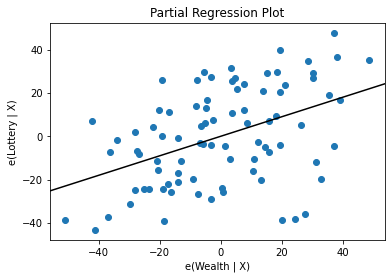

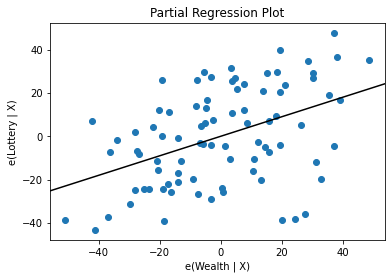

In [12]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'], data=guery1, obs_labels=False)